In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, f1_score, precision_recall_curve
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel,SelectKBest,SelectPercentile
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler 


In [51]:
fullFileName='youtube.csv'
data=pd.read_csv(fullFileName, sep=' ')

data_=data.replace(['1:','2:','3:','4:','5:','6:','7:','8:','9:','10:','11:','12:','13:','14:','15:','16:','17:','18:','19:',
                   '20:','21:','22:','23:','24:','25:','25:','27:','28:','29:','30:','31:','32:','33:','34:','35:','36:','37:','38:','39:','40:','50:','60:'],'',regex=True).astype(float) 

data_.columns = ['user_class','Total number of views of all videos uploaded','Total number of views of all video responses',
                 'Total number of views of all responded videos',
'Total duration of all videos uploaded','Total duration of all video responses','Total duration of all responded videos',
'Total number of ratings of all videos uploaded','Total number of ratings of all video responses','Total number of ratings of all responded videos',
'Total number of comments of all videos uploaded','Total number of comments of all video responses','Total number of comments of all responded videos','Total number of times that all videos uploaded were added as favorite',
'Total number of times that all video responses were added as favorite','Total number of times that all responded videos were added as favorite','Total number of honors of all videos uploaded','Total number of honors of all video responses',
'Total number of honors of all responded videos','Total number of links of all videos uploaded','Total number of links of all video responses','Total number of links of all responded videos',
'Average number of views of all videos uploaded','Average number of views of all video responses','Average number of views of all responded videos',
 'Average duration of all videos uploaded','Average duration of all video responses','Average duration of all responded videos','Average number of ratings of all videos uploaded','Average number of ratings of all video responses',
'Average number of ratings of all responded videos','Average number of comments of all videos uploaded','Average number of comments of all video responses','Average number of comments of all responded videos','Average number of times that all videos uploaded were added as favorite',
'Average number of times that all video responses were added as favorite','Average number of times that all responded videos were added as favorite','Average number of honors of all videos uploaded','Average number of honors of all video responses','Average number of honors of all responded videos',
'Average number of links of all videos uploaded','Average number of links of all video responses','Average number of links of all responded videos','Clustering Coefficient','Reciprocity','UserRank','Betweenness','Assortativity in-in degree',
'Assortativity in-out degree','Assortativity out-in degree','Assortativity out-out degree','Number of responses posted','Number of responses received','Number of friends','Number of videos watched','Number of videos uploaded',
'Number of videos added as favorite','Number of subscriptions','Number of subscribers','Maximum number of videos uploaded in 24 hours','Average time between video uploads']              
                 
data_['user_class'].replace((1), (3), inplace = True)
data_['user_class'].value_counts()

3.0    672
2.0    156
Name: user_class, dtype: int64

In [52]:
#first we count the number of missing values in each row in pandas dataframe
data_.isnull().sum(axis=0)
print("Dataset Lenght:: ",len(data_))
print("Dataset shape:: ", data_.shape)

Dataset Lenght::  828
Dataset shape::  (828, 61)


In [53]:
print("Dataset:: ")
data_.head()
data_.info()
data_.describe()

Dataset:: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 61 columns):
user_class                                                                  828 non-null float64
Total number of views of all videos uploaded                                828 non-null float64
Total number of views of all video responses                                828 non-null float64
Total number of views of all responded videos                               828 non-null float64
Total duration of all videos uploaded                                       828 non-null float64
Total duration of all video responses                                       828 non-null float64
Total duration of all responded videos                                      828 non-null float64
Total number of ratings of all videos uploaded                              828 non-null float64
Total number of ratings of all video responses                              828 non-null float64
Total numbe

,user_class,Total number of views of all videos uploaded,Total number of views of all video responses,Total number of views of all responded videos,Total duration of all videos uploaded,Total duration of all video responses,Total duration of all responded videos,Total number of ratings of all videos uploaded,Total number of ratings of all video responses,Total number of ratings of all responded videos,...,Number of responses posted,Number of responses received,Number of friends,Number of videos watched,Number of videos uploaded,Number of videos added as favorite,Number of subscriptions,Number of subscribers,Maximum number of videos uploaded in 24 hours,Average time between video uploads
count,828.000000,8.280000e+02,8.280000e+02,8.280000e+02,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,...,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,8.280000e+02
mean,2.811594,4.132443e+05,9.065943e+04,8.664683e+06,12916.522947,2786.105072,2846.300725,2523.701691,643.015700,37584.998792,...,581.188406,660.907005,5064.342995,36856.285024,1481.985507,2022.259662,1229.875604,13690.445652,160.103865,3.585224e+06
std,0.391272,1.488269e+06,3.501392e+05,1.764183e+07,26038.343497,5167.388046,5202.768288,10580.569270,2989.969344,76740.216942,...,2666.074783,3273.872123,32238.092352,69149.515824,3518.920990,2864.462352,5169.813345,63078.120708,427.293704,1.346605e+07
min,2.000000,9.000000e+00,9.000000e+00,3.110000e+02,0.000000,0.000000,8.000000,0.000000,0.000000,3.000000,...,51.000000,50.000000,50.000000,50.000000,51.000000,50.000000,50.000000,50.000000,51.000000,8.100000e+00
25%,3.000000,8.856750e+03,1.745750e+03,1.344152e+05,1821.250000,320.250000,377.000000,61.750000,15.000000,865.250000,...,53.000000,50.000000,55.000000,5338.750000,514.000000,510.750000,50.000000,53.000000,52.000000,2.351306e+05
50%,3.000000,4.818800e+04,1.111550e+04,1.039888e+06,5353.500000,996.500000,1063.000000,327.500000,86.500000,6083.000000,...,59.000000,53.000000,531.000000,5953.000000,532.500000,549.000000,51.000000,526.000000,54.000000,5.804255e+05
75%,3.000000,2.449685e+05,4.635350e+04,7.824169e+06,13791.250000,3076.500000,3000.750000,1524.750000,356.250000,34991.250000,...,521.000000,518.000000,5133.250000,52393.750000,576.250000,5136.250000,533.000000,5217.000000,57.000000,1.290931e+06
max,3.000000,1.952458e+07,6.454217e+06,1.745945e+08,399444.000000,59257.000000,64994.000000,154072.000000,67990.000000,566988.000000,...,51304.000000,51566.000000,530748.000000,518892.000000,51304.000000,51367.000000,51025.000000,548573.000000,5241.000000,7.255527e+07


In [54]:
array=data_.values
X1 = array[:,1: ] 
Y = array[:,0]
 
""" MIN MAX SCALER """
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
# Scaled feature 
X2 = min_max_scaler.fit_transform(X1) 

  
""" Standardisation """ 
Standardisation = preprocessing.StandardScaler() 
# Scaled feature 
X = Standardisation.fit_transform(X2) 

#Spliting Dataset into Test and Train
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state=0)
#Applying Standard scaling to get optimized result



In [55]:
###remove constant,
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter=constant_filter.transform(X_train)
X_test_filter=constant_filter.transform(X_test)

In [56]:
##duplicate features
X_train_T=X_train_filter.T
X_test_T=X_test_filter.T

In [57]:
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)

In [58]:
X_train_T.duplicated().sum()

0

In [59]:
####we have duplicate features here
duplicated_features=X_train_T.duplicated()

In [60]:
features_to_keep=[not index for index in duplicated_features]

In [61]:
X_train_unique=X_train_T[features_to_keep].T
X_test_unique=X_test_T[features_to_keep].T

In [62]:
X_train_unique.shape,X_test_unique.shape

((662, 60), (166, 60))

In [63]:
###calculate the MI
mi=mutual_info_classif(X_train_unique, y_train)

In [64]:
len(mi)

60

In [65]:
mi

array([0.02778991, 0.        , 0.14478495, 0.05627905, 0.02367451,
       0.05861321, 0.0393775 , 0.03369536, 0.13918806, 0.03848656,
       0.02706207, 0.15313961, 0.05135598, 0.        , 0.03616053,
       0.01002039, 0.        , 0.09052975, 0.01977756, 0.00289549,
       0.04394476, 0.00745711, 0.00283035, 0.17134241, 0.0165799 ,
       0.01294196, 0.06325555, 0.06033496, 0.02318314, 0.13747074,
       0.03230441, 0.04028041, 0.18014296, 0.        , 0.00204972,
       0.07103743, 0.06061467, 0.        , 0.10306157, 0.        ,
       0.        , 0.05575564, 0.00675313, 0.02415655, 0.11184732,
       0.02214355, 0.06894978, 0.06939436, 0.06759521, 0.046175  ,
       0.01668587, 0.06726764, 0.        , 0.04682043, 0.03920297,
       0.03691519, 0.02243687, 0.        , 0.        , 0.0297121 ])

In [66]:
mi=pd.Series(mi)
mi.index=X_train_unique.columns

In [67]:
mi.sort_values(ascending=False, inplace=True)

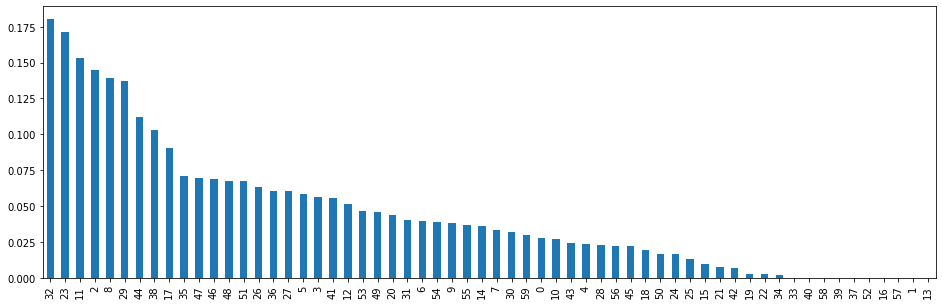

In [68]:
mi.plot.bar(figsize=(16,5))

In [69]:
#we select 10 percentage of features k=10
sel=SelectPercentile(mutual_info_classif,percentile=16).fit(X_train_unique,y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([2, 8, 11, 17, 23, 29, 32, 38, 44, 46], dtype='int64')

In [70]:
len(X_train_unique.columns[sel.get_support()])

10

In [71]:
X_train_mi=sel.transform(X_train_unique)
X_test_mi=sel.transform(X_test_unique)

In [72]:
X_train_mi.shape

(662, 10)

In [73]:
###build the model and compare the performance

In [74]:
#calculate TP, TN,FN,FP
def compute_tp_tn_fn_fp(actual_y, predicted_y):
    #we define spam class(2) as positive rate, and not spam class(3) as negative rate
    #True positive _ actual =2, predicted=2
    #False positive _ actual=2, predicted=3
    #False negative _ actual=3, predicted=2
    #True negative _ actual=3, predicted=3
    tp=sum((actual_y == 2) & (predicted_y == 2))
    tn=sum((actual_y == 3) & (predicted_y == 3))
    fn=sum((actual_y == 3) & (predicted_y == 2))
    fp=sum((actual_y == 2) & (predicted_y == 3))
    return tp, tn, fp, fn

#calculate accuracy
def compute_accuracy(tp,tn,fn,fp):
    #Acurracy=TP+TN/FP+FN+TP+TN
    return((tp+tn*100)/float(tp+tn+fn+fp) if (tp+tn+fn+fp) != 0 else 0)

#calculate precission
def compute_precision(tp,fp):
    #Acurracy=TP/FP+TP
      return((tp*100)/float(tp+fp) if (tp+fp) != 0 else 0)
    
#calculate recall
def compute_recall(tp,fn):
     #recall=TP/FN+TP
        return ((tp*100)/float(tp+fn) if (tp+fn) != 0 else 0)
    
#calculate f1_score
def compute_f1_score(actual_y, predicted_y):
        tp,tn,fp,fn= compute_tp_tn_fn_fp(actual_y, predicted_y)
        precision=compute_precision(tp,fp)/100 
        recall=compute_recall(tp,fn)/100
        f1_score=(2*precision*recall)/(precision+recall) if (precision+recall) != 0 else 0
        return f1_score

def performance_of_the_model(actual_y,predicted_y): 
    
    tp_r,tn_r, fp_r,fn_r=compute_tp_tn_fn_fp(actual_y,predicted_y)
    print('TP for dt is:',tp_r)
    print('TN for dt is:',tn_r)
    print('FP for dt is:',fp_r)
    print('FN for dt is:',fn_r)
    accuracy=compute_accuracy(tp_r,tn_r,fn_r,fp_r)
    print('accuracy:', accuracy)
    precision=compute_precision(tp_r,fp_r)
    print('precision:', precision)
    recall=compute_recall(tp_r,fn_r)
    print('recall:', recall)
    f1_score=compute_f1_score(actual_y,predicted_y)
    print('f1_score:', f1_score)
    return
    

In [75]:
#Decision Tree Classifier
#Function to perform training with Entropy
dt=DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=2)
dt.fit(X_train_mi, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [76]:
# Function to make prediction
y_pred_en=dt.predict(X_test_mi)
#checking performance of the model
print(confusion_matrix(y_test, y_pred_en))
print(classification_report(y_test, y_pred_en))
performance_of_the_model(y_test, y_pred_en)  



[[ 10  11]
 [  5 140]]
              precision    recall  f1-score   support

         2.0       0.67      0.48      0.56        21
         3.0       0.93      0.97      0.95       145

    accuracy                           0.90       166
   macro avg       0.80      0.72      0.75       166
weighted avg       0.89      0.90      0.90       166

TP for dt is: 10
TN for dt is: 140
FP for dt is: 11
FN for dt is: 5
accuracy: 84.39759036144578
precision: 47.61904761904762
recall: 66.66666666666667
f1_score: 0.5555555555555556


In [77]:
#Random Forest Classifier
rfc=RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train_mi, y_train)
predictionRF=rfc.predict(X_test_mi)
#checking performance of the model
print(confusion_matrix(y_test, predictionRF))
print(classification_report(y_test, predictionRF))
performance_of_the_model(y_test, predictionRF) 

[[ 11  10]
 [  6 139]]
              precision    recall  f1-score   support

         2.0       0.65      0.52      0.58        21
         3.0       0.93      0.96      0.95       145

    accuracy                           0.90       166
   macro avg       0.79      0.74      0.76       166
weighted avg       0.90      0.90      0.90       166

TP for dt is: 11
TN for dt is: 139
FP for dt is: 10
FN for dt is: 6
accuracy: 83.8012048192771
precision: 52.38095238095238
recall: 64.70588235294117
f1_score: 0.5789473684210527


C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [78]:
#define K
import math
math.sqrt(len(y_test))

12.884098726725126

In [79]:
#K-NN classifier
knn=KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

#predict the test set results
knn.fit(X_train_mi, y_train)
predictionKNN=knn.predict(X_test_mi)
#Evaluate model
print(confusion_matrix(y_test, predictionKNN))
print(classification_report(y_test, predictionKNN))
performance_of_the_model(y_test, predictionKNN)

[[ 10  11]
 [  9 136]]
              precision    recall  f1-score   support

         2.0       0.53      0.48      0.50        21
         3.0       0.93      0.94      0.93       145

    accuracy                           0.88       166
   macro avg       0.73      0.71      0.72       166
weighted avg       0.87      0.88      0.88       166

TP for dt is: 10
TN for dt is: 136
FP for dt is: 11
FN for dt is: 9
accuracy: 81.98795180722891
precision: 47.61904761904762
recall: 52.63157894736842
f1_score: 0.5


In [80]:
# svm Classifier
clf=svm.SVC(kernel="linear", C=0.8,probability=True)
clf.fit(X_train_mi,y_train)
predictionSVM=clf.predict(X_test_mi)

#Evaluate model
print(confusion_matrix(y_test, predictionSVM))
print(classification_report(y_test, predictionSVM))
performance_of_the_model(y_test, predictionSVM)

[[  9  12]
 [  4 141]]
              precision    recall  f1-score   support

         2.0       0.69      0.43      0.53        21
         3.0       0.92      0.97      0.95       145

    accuracy                           0.90       166
   macro avg       0.81      0.70      0.74       166
weighted avg       0.89      0.90      0.89       166

TP for dt is: 9
TN for dt is: 141
FP for dt is: 12
FN for dt is: 4
accuracy: 84.99397590361446
precision: 42.857142857142854
recall: 69.23076923076923
f1_score: 0.5294117647058824


In [81]:
#Bagging Classifier
bg=BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators=10)
bg=BaggingClassifier()
bg.fit(X_train_mi,y_train)
predictionbg=bg.predict(X_test_mi)

#Evaluate model
print(confusion_matrix(y_test, predictionbg))
print(classification_report(y_test, predictionbg))
performance_of_the_model(y_test, predictionbg)

[[ 11  10]
 [ 10 135]]
              precision    recall  f1-score   support

         2.0       0.52      0.52      0.52        21
         3.0       0.93      0.93      0.93       145

    accuracy                           0.88       166
   macro avg       0.73      0.73      0.73       166
weighted avg       0.88      0.88      0.88       166

TP for dt is: 11
TN for dt is: 135
FP for dt is: 10
FN for dt is: 10
accuracy: 81.39156626506023
precision: 52.38095238095238
recall: 52.38095238095238
f1_score: 0.5238095238095238


In [82]:
#Boosting Classifier- Ada Boost
adb=AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=1)
adb.fit(X_train_mi,y_train)
predictionadb=adb.predict(X_test_mi)

#Evaluate model
print(confusion_matrix(y_test, predictionadb))
print(classification_report(y_test, predictionadb))
performance_of_the_model(y_test, predictionadb)

[[ 12   9]
 [  9 136]]
              precision    recall  f1-score   support

         2.0       0.57      0.57      0.57        21
         3.0       0.94      0.94      0.94       145

    accuracy                           0.89       166
   macro avg       0.75      0.75      0.75       166
weighted avg       0.89      0.89      0.89       166

TP for dt is: 12
TN for dt is: 136
FP for dt is: 9
FN for dt is: 9
accuracy: 82.0
precision: 57.142857142857146
recall: 57.142857142857146
f1_score: 0.5714285714285715


In [83]:
#Naive bayse Classifier
nb=GaussianNB()
nb.fit(X_train_mi,y_train)
predictionnb=nb.predict(X_test_mi)

#Evaluate model
print(confusion_matrix(y_test, predictionnb))
print(classification_report(y_test, predictionnb))
performance_of_the_model(y_test, predictionnb)

[[20  1]
 [94 51]]
              precision    recall  f1-score   support

         2.0       0.18      0.95      0.30        21
         3.0       0.98      0.35      0.52       145

    accuracy                           0.43       166
   macro avg       0.58      0.65      0.41       166
weighted avg       0.88      0.43      0.49       166

TP for dt is: 20
TN for dt is: 51
FP for dt is: 1
FN for dt is: 94
accuracy: 30.843373493975903
precision: 95.23809523809524
recall: 17.54385964912281
f1_score: 0.29629629629629634


In [84]:
#creat Multilayer neural network Classifier
nn=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train_mi,y_train)
predictionNN=nn.predict(X_test_mi)

#Evaluate model
print(confusion_matrix(y_test, predictionNN))
print(classification_report(y_test, predictionNN))
performance_of_the_model(y_test, predictionNN)



[[ 13   8]
 [  8 137]]
              precision    recall  f1-score   support

         2.0       0.62      0.62      0.62        21
         3.0       0.94      0.94      0.94       145

    accuracy                           0.90       166
   macro avg       0.78      0.78      0.78       166
weighted avg       0.90      0.90      0.90       166

TP for dt is: 13
TN for dt is: 137
FP for dt is: 8
FN for dt is: 8
accuracy: 82.60843373493977
precision: 61.904761904761905
recall: 61.904761904761905
f1_score: 0.6190476190476191


In [85]:
#Voting Classifier- Multiple Model Ensemble
evc=VotingClassifier(estimators=[('dt',dt),('rfc',rfc),('clf',clf),('knn',knn),('bg',bg),('adb',adb),('nb',nb),('nn',nn)], voting='soft')
evc.fit(X_train_mi,y_train)
predictionevc=evc.predict(X_test_mi)

#Evaluate model
print(confusion_matrix(y_test, predictionevc))
print(classification_report(y_test, predictionevc))
performance_of_the_model(y_test, predictionevc)

[[ 12   9]
 [ 10 135]]
              precision    recall  f1-score   support

         2.0       0.55      0.57      0.56        21
         3.0       0.94      0.93      0.93       145

    accuracy                           0.89       166
   macro avg       0.74      0.75      0.75       166
weighted avg       0.89      0.89      0.89       166

TP for dt is: 12
TN for dt is: 135
FP for dt is: 9
FN for dt is: 10
accuracy: 81.39759036144578
precision: 57.142857142857146
recall: 54.54545454545455
f1_score: 0.5581395348837208


In [86]:
#defining learning classifiers
names=["Decision_Tree", "Random_Forest", "linear_SVM","Nearest_Neighbors","Bagging","AdaBoost","Naive_Bayes","Neural_Net","Vothing_classifier"]
classifiers = [dt,rfc,clf,knn,bg,adb,nb,nn,evc]

#Build Model, Apply Model on Test Data & Record Accuracy Scores
scores = []
Fmeasure=[]
for name, clf in zip(names, classifiers):
    clf.fit(X_train_mi, y_train)
    prediction=clf.predict(X_test_mi)
    scores.append(compute_tp_tn_fn_fp(y_test, prediction))
    f1_score=compute_f1_score(y_test,prediction)
    Fmeasure.append(f1_score)
    

In [87]:
scores

[(10, 140, 11, 5),
 (11, 139, 10, 6),
 (9, 141, 12, 4),
 (10, 136, 11, 9),
 (16, 133, 5, 12),
 (11, 137, 10, 8),
 (20, 51, 1, 94),
 (13, 137, 8, 8),
 (12, 133, 9, 12)]

In [88]:
tp=[i[0] for i in scores]

In [89]:
tp

[10, 11, 9, 10, 16, 11, 20, 13, 12]

In [90]:
fp=[i[2] for i in scores]

In [91]:
fp

[11, 10, 12, 11, 5, 10, 1, 8, 9]

In [92]:
Fmeasure

[0.5555555555555556,
 0.5789473684210527,
 0.5294117647058824,
 0.5,
 0.6530612244897959,
 0.5500000000000002,
 0.29629629629629634,
 0.6190476190476191,
 0.5333333333333333]

In [93]:


# #defining learning classifiers
# names=["Decision_Tree", "Random_Forest", "linear_SVM","Nearest_Neighbors","Bagging","AdaBoost","Naive_Bayes","Neural_Net","Vothing_classifier"]
# classifiers = [dt,rfc,clf,knn,bg,adb,nb,nn,evc]
#define Prediction probabilities
r_probs_ = [0 for _ in range(len(y_test))]
dt_probs = dt.predict_proba(X_test_mi)
rfc_probs = rfc.predict_proba(X_test_mi)
clf_probs = clf.predict_proba(X_test_mi)
knn_probs = knn.predict_proba(X_test_mi)
bg_probs = bg.predict_proba(X_test_mi)
adb_probs = adb.predict_proba(X_test_mi)
nb_probs = nb.predict_proba(X_test_mi)
nn_probs = nn.predict_proba(X_test_mi)
evc_probs = evc.predict_proba(X_test_mi)

#Probabilities for the positive outcome is kept
dt_probs_ = dt_probs[:,1]
rfc_probs_ = rfc_probs[:,1]
clf_probs_ = clf_probs[:,1]
knn_probs_ = knn_probs[:,1]
bg_probs_ = bg_probs[:,1]
adb_probs_ = adb_probs[:,1]
nb_probs_ = nb_probs[:,1]
nn_probs_ = nn_probs[:,1]
evc_probs_ = evc_probs[:,1]
#ROC is the receiver operating characteristic AUROC is the area under the ROC curve
result=[]
r_auc = roc_auc_score(y_test, r_probs_)
dt_auc = roc_auc_score(y_test, dt_probs_)
result.append(dt_auc)
rfc_auc = roc_auc_score(y_test, rfc_probs_)
result.append(rfc_auc)
clf_auc = roc_auc_score(y_test, clf_probs_)
result.append(clf_auc)
knn_auc = roc_auc_score(y_test, knn_probs_)
result.append(knn_auc)
bg_auc = roc_auc_score(y_test, bg_probs_)
result.append(bg_auc)
adb_auc = roc_auc_score(y_test, adb_probs_)
result.append(adb_auc)
nb_auc = roc_auc_score(y_test, nb_probs_)
result.append(nb_auc)
nn_auc = roc_auc_score(y_test, nn_probs_)
result.append(nn_auc)
evc_auc = roc_auc_score(y_test, evc_probs_)
result.append(evc_auc)

#Print AUROC scores
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Decision_Tree: AUROC = %.3f' % (dt_auc))
print('Random_Forest: AUROC = %.3f' % (rfc_auc))
print('linear_SVM: AUROC = %.3f' % (clf_auc))
print('Nearest_Neighbors: AUROC = %.3f' % (knn_auc))
print('Bagging: AUROC = %.3f' % (bg_auc))
print('AdaBoost: AUROC = %.3f' % (adb_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('Neural_Net: AUROC = %.3f' % (nn_auc))
print('Vothing_classifier: AUROC = %.3f' % (evc_auc))

#Calculate ROC curve
r_fpr, r_tpr, threshold = roc_curve(y_test, r_probs_,pos_label=1,drop_intermediate=True)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, dt_probs_,pos_label=1,drop_intermediate=True)
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, rfc_probs_,pos_label=1,drop_intermediate=True)
clf_fpr, clf_tpr, threshold= roc_curve(y_test, clf_probs_,pos_label=1,drop_intermediate=True)
knn_fpr, knn_tpr,threshold = roc_curve(y_test, knn_probs_,pos_label=1,drop_intermediate=True)
bg_fpr, bg_tpr, threshold= roc_curve(y_test, bg_probs_,pos_label=1,drop_intermediate=True)
adb_fpr, adb_tpr, threshold = roc_curve(y_test, adb_probs_,pos_label=1,drop_intermediate=True)
nb_fpr, nb_tpr, threshold = roc_curve(y_test, nb_probs_,pos_label=1,drop_intermediate=True)
nn_fpr, nb_tpr, threshold = roc_curve(y_test, nn_probs_,pos_label=1,drop_intermediate=True)
evc_fpr, evc_tpr, threshold= roc_curve(y_test, evc_probs_,pos_label=1,drop_intermediate=True)


# #Plot the ROC curve
# plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
# plt.plot(dt_fpr, dt_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % dt_auc)
# plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % rfc_auc)
# plt.plot(clf_fpr, clf_tpr, marker='.', label='linear_SVM (AUROC = %0.3f)' % clf_auc)
# plt.plot(knn_fpr, knn_tpr, marker='.', label='Nearest_Neighbors(AUROC = %0.3f)' % knn_auc)
# plt.plot(bg_fpr, bg_tpr, marker='.', label='Bagging (AUROC = %0.3f)' % bg_auc)
# plt.plot(adb_fpr, adb_tpr, marker='.', label='AdaBoost (AUROC = %0.3f)' % adb_auc)
# plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive_Bayes (AUROC = %0.3f)' % nb_auc)
# plt.plot(nn_fpr, nn_tpr, marker='.', label='Neural_Net (AUROC = %0.3f)' % nn_auc)
# plt.plot(evc_fpr, evc_tpr, marker='.', label='Vothing_classifier (AUROC = %0.3f)' % evc_auc)
# # Title
# plt.title('ROC Plot')
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

Random (chance) Prediction: AUROC = 0.500
Decision_Tree: AUROC = 0.828
Random_Forest: AUROC = 0.879
linear_SVM: AUROC = 0.890
Nearest_Neighbors: AUROC = 0.876
Bagging: AUROC = 0.876
AdaBoost: AUROC = 0.837
Naive Bayes: AUROC = 0.852
Neural_Net: AUROC = 0.847
Vothing_classifier: AUROC = 0.890


C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [94]:
result

[0.8275862068965517,
 0.8786535303776682,
 0.8899835796387521,
 0.8756978653530377,
 0.8758620689655172,
 0.8374384236453202,
 0.8517241379310345,
 0.8472906403940886,
 0.8899835796387521]

In [95]:
#create data frame of model performance
df = pd.DataFrame()
df['Machine Learning algorithms'] = names
df['F-measure-YouTube-IG'] = Fmeasure 
df['TP-YouTube-IG']=tp
df['FP-YouTube-IG']=fp
df['AUC-YouTube-IG']=result

In [96]:
#adding colors to the data frame
cm = sns.light_palette("#008080", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Machine Learning algorithms,F-measure-YouTube-IG,TP-YouTube-IG,FP-YouTube-IG,AUC-YouTube-IG
0,Decision_Tree,0.555556,10,11,0.827586
1,Random_Forest,0.578947,11,10,0.878654
2,linear_SVM,0.529412,9,12,0.889984
3,Nearest_Neighbors,0.5,10,11,0.875698
4,Bagging,0.653061,16,5,0.875862
5,AdaBoost,0.55,11,10,0.837438
6,Naive_Bayes,0.296296,20,1,0.851724
7,Neural_Net,0.619048,13,8,0.847291
8,Vothing_classifier,0.533333,12,9,0.889984
